<a href="https://colab.research.google.com/github/Nazneen-akram/coursera-rep/blob/main/social_media_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Upload kaggle.json
uploaded = files.upload()

# Make sure kaggle.json is in the list of uploaded files
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle (2).json
User uploaded file "kaggle (2).json" with length 68 bytes


In [26]:
import pandas as pd

import zipfile
import os

import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# Install the Kaggle library
!pip install kaggle

# Make a directory for Kaggle
!mkdir ~/.kaggle

# Copy the kaggle.json to this new directory
!cp kaggle.json ~/.kaggle/

# Permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

# Check if everything is set up by listing competitions
!kaggle competitions list


mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                                              deadline             category            reward  teamCount  userHasEntered  
-------------------------------------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
https://www.kaggle.com/competitions/llm-detect-ai-generated-text                 2024-01-22 23:59:00  Featured          $110,000       4357           False  
https://www.kaggle.com/competitions/blood-vessel-segmentation                    2024-02-06 23:59:00  Research           $80,000        840           False  
https://www.kaggle.com/competitions/pii-detection-removal-from-educational-data  2024-04-23 23:59:00  Featured           $60,000         57           False  
https://www.kaggle.com/competitions/predict-energy-behavior-of-prosumers         2024-01-31 23:59:00  Featured           $50,000       2355           

In [3]:
# Replace 'dataset-name' with the actual dataset name
!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis

# To see the files downloaded
!ls


twitter-entity-sentiment-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)
'kaggle (1).json'   kaggle.json   twitter-entity-sentiment-analysis.zip   twitter_validation.csv
'kaggle (2).json'   sample_data   twitter_training.csv


In [5]:
import zipfile
import os

# Replace with the name of the zip file you downloaded
zip_ref = zipfile.ZipFile('twitter-entity-sentiment-analysis.zip', 'r')
zip_ref.extractall()
zip_ref.close()

# Check the extracted files
!ls


'kaggle (1).json'   kaggle.json   twitter-entity-sentiment-analysis.zip   twitter_validation.csv
'kaggle (2).json'   sample_data   twitter_training.csv


In [7]:
# Load the training dataset
training_df = pd.read_csv('/content/twitter_training.csv')

# Load the validation dataset
validation_df = pd.read_csv('/content/twitter_validation.csv')


In [8]:
# Display the first few rows of the training dataset
print("Training Dataset:")
training_df.head()

Training Dataset:


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
# Display the first few rows of the validation dataset
print("\nValidation Dataset:")
validation_df.head()


Validation Dataset:


,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [10]:
# Check the size of the datasets
print("\nSize of Training Dataset:", training_df.shape)
print("Size of Validation Dataset:", validation_df.shape)


Size of Training Dataset: (74681, 4)
Size of Validation Dataset: (999, 4)


In [13]:
# General information about the data
print("\nTraining Dataset Information:")
training_df.info()



Training Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [14]:
print("\nValidation Dataset Information:")
validation_df.info()


Validation Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                  

In [16]:
# Check for missing values
missing_values = training_df.isnull().sum()
missing_values

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [17]:
# Check for duplicate rows
duplicates = training_df.duplicated().sum()
duplicates

2700

In [18]:
# Removing rows with missing tweet text
training_df_cleaned = training_df.dropna(subset=['im getting on borderlands and i will murder you all ,'])

# Removing duplicate rows
training_df_cleaned = training_df_cleaned.drop_duplicates()

# Re-checking for missing values and duplicates after cleaning
missing_values_cleaned = training_df_cleaned.isnull().sum()
duplicates_cleaned = training_df_cleaned.duplicated().sum()

missing_values_cleaned, duplicates_cleaned, training_df_cleaned.shape


(2401                                                     0
 Borderlands                                              0
 Positive                                                 0
 im getting on borderlands and i will murder you all ,    0
 dtype: int64,
 0,
 (71655, 4))

In [19]:
training_df_cleaned

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [20]:
# Renaming the columns for clarity
training_df_cleaned.columns = ['TweetID', 'Category', 'Sentiment', 'TweetText']

# Display the first few rows with the new column names
training_df_cleaned.head()

,TweetID,Category,Sentiment,TweetText
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [25]:
def preprocess_text_simplified(text):
    """
    Function to preprocess the text by:
    - Lowercasing
    - Removing punctuation
    """
    # Lowercasing the text
    text = text.lower()

    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    return text

# Applying the simplified preprocessing to the TweetText column
training_df_cleaned['ProcessedTweetText'] = training_df_cleaned['TweetText'].apply(preprocess_text_simplified)

# Display the first few rows of the dataset after preprocessing
training_df_cleaned.head()


,TweetID,Category,Sentiment,TweetText,ProcessedTweetText
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


In [27]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text_advanced(text):
    """
    Function to preprocess the text by:
    - Lowercasing
    - Removing punctuation
    - Removing stopwords
    - Tokenizing
    """
    # Lowercasing the text
    text = text.lower()

    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenizing
    word_tokens = word_tokenize(text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    filtered_text = [word for word in word_tokens if word not in stop_words]

    return ' '.join(filtered_text)

# Applying the advanced preprocessing to the TweetText column
training_df_cleaned['ProcessedTweetText'] = training_df_cleaned['TweetText'].apply(preprocess_text_advanced)


In [29]:
training_df_cleaned[100:126]

,TweetID,Category,Sentiment,TweetText,ProcessedTweetText
105,2418,Borderlands,Irrelevant,Appreciate by the ( sonic ) electronic concept...,appreciate sonic electronic concepts praxis va...
106,2418,Borderlands,Irrelevant,Appreciate the (sonic) conversations / actions...,appreciate sonic conversations actions klein l...
107,2419,Borderlands,Negative,@Borderlands how do I submit a complaint? Your...,borderlands submit complaint ceo isnt paying s...
108,2419,Borderlands,Negative,"@ Borderlands, how can I file a complaint? You...",borderlands file complaint ceo doesnt pay empl...
109,2419,Borderlands,Negative,@ Borderlands how to file a complaint? Your CE...,borderlands file complaint ceo doesnt pay empl...
110,2419,Borderlands,Negative,@Borderlands how did I submit a complaint? You...,borderlands submit complaint ceo isnt paying c...
111,2419,Borderlands,Negative,@Borderlands how do suppose I submit a complai...,borderlands suppose submit complaint ceo isnai...
112,2419,Borderlands,Negative,Now how do I submit any complaint? Your CEO is...,submit complaint ceo isnt offering staff bonuses
113,2420,Borderlands,Negative,All the Borderlands are fuckin trash,borderlands fuckin trash
114,2420,Borderlands,Negative,All the Borderlands are damn rubbish,borderlands damn rubbish


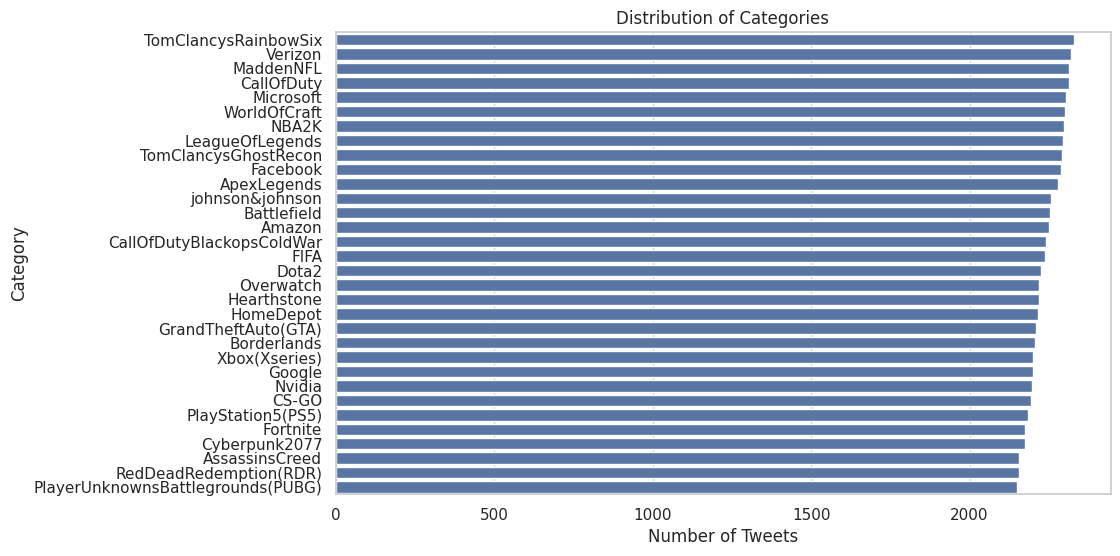

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the distribution of categories
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=training_df_cleaned, order = training_df_cleaned['Category'].value_counts().index)
plt.title('Distribution of Categories')
plt.xlabel('Number of Tweets')
plt.ylabel('Category')
plt.show()


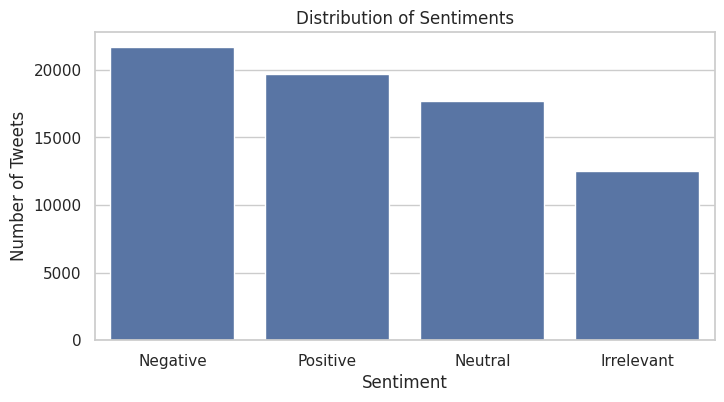

In [31]:
# Plotting the distribution of sentiments
plt.figure(figsize=(8, 4))
sns.countplot(x='Sentiment', data=training_df_cleaned, order = training_df_cleaned['Sentiment'].value_counts().index)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


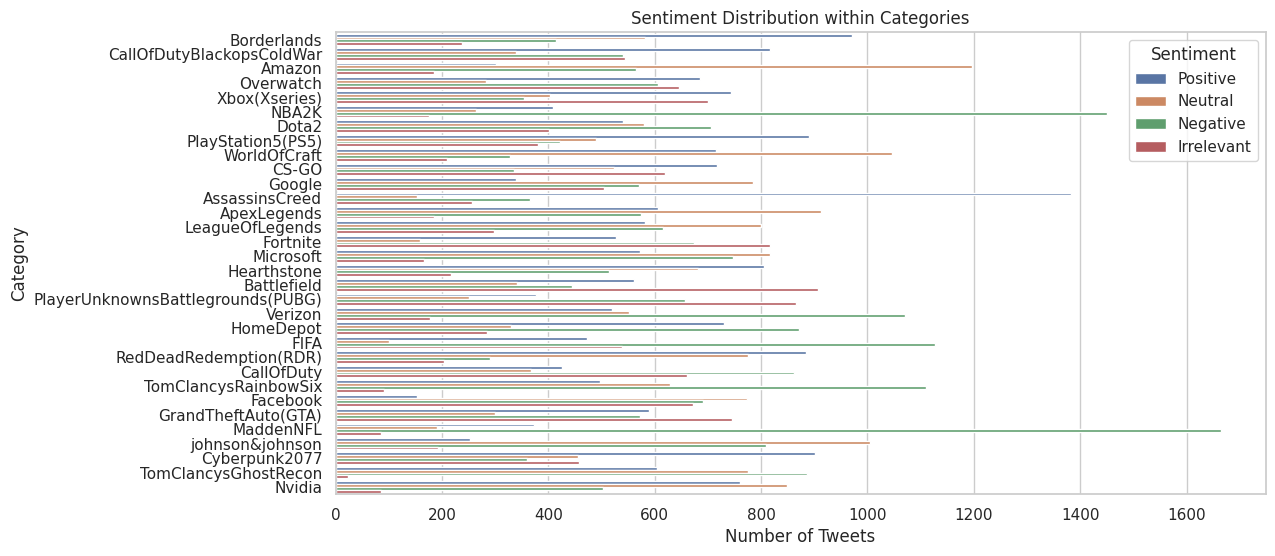

In [32]:
# Plotting sentiment distribution within categories
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', hue='Sentiment', data=training_df_cleaned)
plt.title('Sentiment Distribution within Categories')
plt.xlabel('Number of Tweets')
plt.ylabel('Category')
plt.show()


In [33]:
from collections import Counter

# Combining all the processed tweets into a single list
all_words = ' '.join([text for text in training_df_cleaned['ProcessedTweetText']]).split()

# Counting the frequencies of each word
word_frequencies = Counter(all_words)

# Displaying the 10 most common words
most_common_words = word_frequencies.most_common(10)
print("Most Common Words:", most_common_words)


Most Common Words: [('’', 9253), ('game', 7962), ('like', 4793), ('2', 3977), ('get', 3894), ('im', 3720), ('one', 3539), ('good', 3456), ('play', 3341), ('really', 3209)]


#Topic Modeling
###Topic Modeling is a technique to extract the hidden topics from large volumes of text. One common method is Latent Dirichlet Allocation (LDA). Let's use LDA for topic modeling:

#Preprocessing for LDA:

###Since LDA works on the bag-of-words principle, we need to convert our text data into a format that LDA can understand. We'll create a document-term matrix using CountVectorizer.
#Applying LDA:

###We'll use the LDA model from the scikit-learn library.

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Step 2: Create Document-Term Matrix using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
dtm = tfidf_vectorizer.fit_transform(training_df_cleaned['ProcessedTweetText'])

# Step 3: Apply SVD
# We are using 5 topics here, but you can choose a different number based on your dataset
n_topics = 5
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(dtm)

# Let's look at the top keywords for each topic
terms = tfidf_vectorizer.get_feature_names_out()

for i, comp in enumerate(lsa_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
    print(" ")


Topic 0: 
game
like
love
good
im
play
shit
really
fuck
dead
 
Topic 1: 
unk
love
johnson
happy
verizon
wtf
depot
video
storeplaystationcom
amazon
 
Topic 2: 
dead
red
redemption
unk
game
redeeming
rockstargames
online
best
story
 
Topic 3: 
love
dead
red
redemption
redeeming
world
rockstargames
new
warcraft
absolutely
 
Topic 4: 
fuck
shit
love
dead
red
fucking
redemption
holy
depot
home
 


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Preparing the data
X = training_df_cleaned['ProcessedTweetText']
y = training_df_cleaned['Sentiment']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

# Model Training
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predictions and Evaluation
predictions = model.predict(X_test_tfidf)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

  Irrelevant       0.93      0.46      0.62      2455
    Negative       0.67      0.89      0.77      4433
     Neutral       0.83      0.63      0.71      3532
    Positive       0.69      0.81      0.74      3911

    accuracy                           0.73     14331
   macro avg       0.78      0.70      0.71     14331
weighted avg       0.76      0.73      0.72     14331

[[1135  601  157  562]
 [  24 3925  148  336]
 [  41  723 2213  555]
 [  21  573  156 3161]]
